In [1]:
#importing required libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
#warning handling
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing datasets
demographics = pd.read_csv('customer_data.csv')
services = pd.read_csv('internet_data.csv')
expenses = pd.read_csv('churn_data.csv')

In [4]:
data = pd.merge(demographics, services, on = 'customerID')
data = pd.merge(data,expenses, on = 'customerID')

In [5]:
data.TotalCharges = pd.to_numeric(expenses.TotalCharges, errors='coerce')

In [6]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
data.dropna(axis = 0, inplace = True)

In [8]:
data.shape


(7031, 21)

In [9]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7031 entries, 0 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7031 non-null   object 
 1   gender            7031 non-null   object 
 2   SeniorCitizen     7031 non-null   int64  
 3   Partner           7031 non-null   object 
 4   Dependents        7031 non-null   object 
 5   MultipleLines     7031 non-null   object 
 6   InternetService   7031 non-null   object 
 7   OnlineSecurity    7031 non-null   object 
 8   OnlineBackup      7031 non-null   object 
 9   DeviceProtection  7031 non-null   object 
 10  TechSupport       7031 non-null   object 
 11  StreamingTV       7031 non-null   object 
 12  StreamingMovies   7031 non-null   object 
 13  tenure            7031 non-null   int64  
 14  PhoneService      7031 non-null   object 
 15  Contract          7031 non-null   object 
 16  PaperlessBilling  7031 non-null   object 


In [11]:
data.drop('customerID', axis = 1, inplace = True)

In [12]:
varlist = list(data.columns)
for x in ['gender','StreamingTV','StreamingMovies']:
    varlist.remove(x)
varlist


['SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'tenure',
 'PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [13]:
data = data[varlist]

In [14]:
varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})


data[varlist] = data[varlist].apply(binary_map)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7031 entries, 0 to 7041
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7031 non-null   int64  
 1   Partner           7031 non-null   int64  
 2   Dependents        7031 non-null   int64  
 3   MultipleLines     7031 non-null   object 
 4   InternetService   7031 non-null   object 
 5   OnlineSecurity    7031 non-null   object 
 6   OnlineBackup      7031 non-null   object 
 7   DeviceProtection  7031 non-null   object 
 8   TechSupport       7031 non-null   object 
 9   tenure            7031 non-null   int64  
 10  PhoneService      7031 non-null   int64  
 11  Contract          7031 non-null   object 
 12  PaperlessBilling  7031 non-null   int64  
 13  PaymentMethod     7031 non-null   object 
 14  MonthlyCharges    7031 non-null   float64
 15  TotalCharges      7031 non-null   float64
 16  Churn             7031 non-null   int64  


In [16]:
data.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
data = pd.get_dummies(data, drop_first = False)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = list(data.columns)
data[cols] = scaler.fit_transform(data[cols])

In [19]:
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,...,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,0.0,0.000000,0.0,1.0,0.115423,0.001275,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.464789,1.0,0.0,0.385075,0.215867,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.014085,1.0,1.0,0.354229,0.010310,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.619718,0.0,0.0,0.239303,0.210241,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.014085,1.0,1.0,0.521891,0.015330,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 42)
df_train.shape, df_test.shape

((4921, 34), (2110, 34))

In [21]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid s
%matplotlib inline



# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':500
        }         
           
          
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)

In [22]:
xgb_clf

XGBClassifier(alpha=10, base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=1.0, max_delta_step=None, max_depth=4,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [23]:
# this function is taken from the reference article of hyperparameter tuning class.
# This function is only applicable for Xg boost right now but certaon code can be added to use it for other models as well.
# certain corrections and changes have been made to supress errors. Rest of the code is same as that in the article.
def modelfit(alg, dtrain, predictors, target, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'],
                          nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print( "Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
                    
    importance = alg.feature_importances_.argsort()
    importance = importance[::-1] # reversing the list  descending order
    feat_imp=pd.DataFrame({
    'cols':dtrain.columns[importance],
    'imps':alg.feature_importances_[importance]
})
# plot feature importance
    plt.figure(figsize = (50,20))
    sns.barplot(x = 'cols', y = 'imps', data = feat_imp)
    plt.xticks(rotation=90)


Model Report
Accuracy : 0.8167
AUC Score (Train): 0.871244


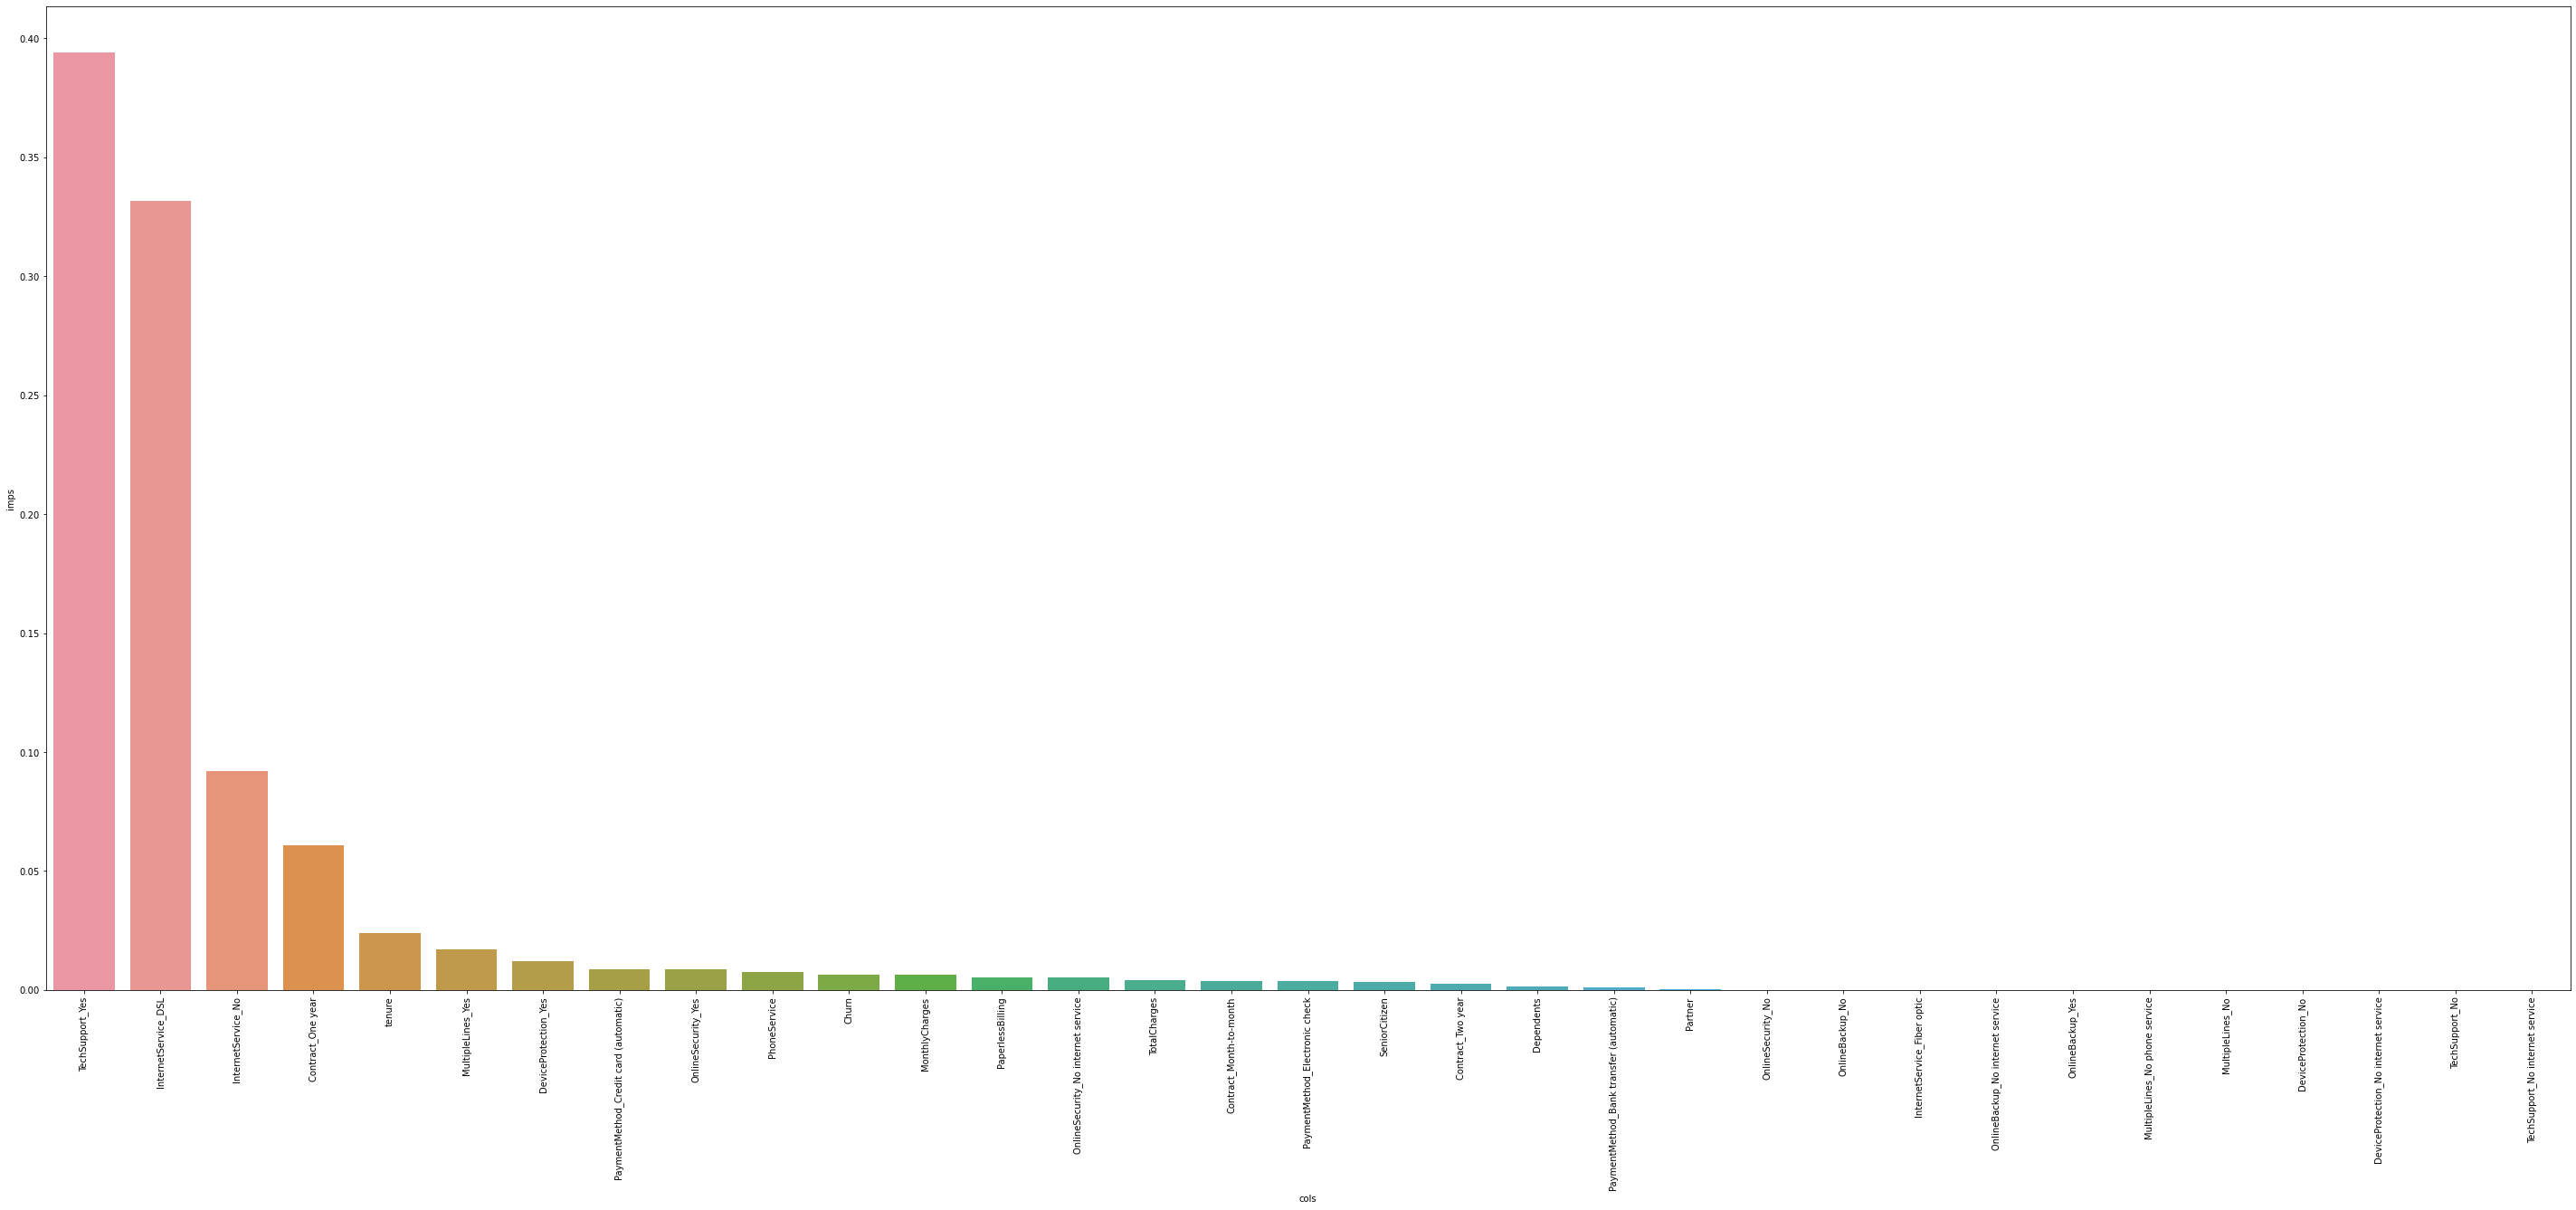

In [24]:
lst = [x for x in df_train.columns if x not in ['Churn']]
target = 'Churn'
modelfit(xgb_clf, df_train, lst, target)

In [25]:
from sklearn.model_selection import GridSearchCV
def bestvalues(model, dtrain, parameters, target ,cvrounds = 5, scoring = 'roc_auc'):
    grid_search = GridSearchCV(estimator = model,  
                           param_grid = parameters,
                           scoring = scoring,
                           cv = cvrounds,
                           verbose=0)
    input_attributes = [x for x in dtrain.columns if x not in [target]]
    grid_search.fit(dtrain[input_attributes], dtrain[target])
    # best score achieved during the GridSearchCV
    print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
    print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
    print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))
    return grid_search.best_estimator_

In [26]:
parameters = {'max_depth': range(3,10),
             'min_child_weight':range(1,6)}
xgb_clf2 = bestvalues(xgb_clf, df_train, parameters, 'Churn') # max_depth=4,min_child_weight=1

[17:56:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:56:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:56:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:56:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [27]:
xgb_clf2 # max_depth=3,min_child_weight=3

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1.0, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=8, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
parameters = {'gamma':[i/10.0 for i in range(0,10)]} #gamma = 0
xgb_clf3 = bestvalues(xgb_clf2, df_train, parameters, 'Churn')

[17:58:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [32]:
#fine tuning gamma
parameters = {'gamma':[i/100.0 for i in range(20,40)]} #gamma = 0
xgb_clf3 = bestvalues(xgb_clf2, df_train, parameters, 'Churn')

[18:00:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:00:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:00:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:00:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [33]:
xgb_clf3 #gamma = 3

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1.0, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=8, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
parameters= {
 'subsample':[i/10.0 for i in range(1,10)],
 'colsample_bytree':[i/10.0 for i in range(1,10)]
}
xgb_clf4 = bestvalues(xgb_clf3, df_train, parameters, 'Churn') # colsample_bytree = 1 , subsample = 1

[18:05:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:05:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:05:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:05:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [36]:
#fine tuning
parameters= {
 'subsample':[i/100.0 for i in range(85,100)],
 'colsample_bytree':[i/100.0 for i in range(85,100)]
}
xgb_clf4 = bestvalues(xgb_clf3, df_train, parameters, 'Churn')

[18:09:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:09:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:09:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:09:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [37]:
xgb_clf4 # colsample_bytree = 0.94 , subsample = 0.97

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.94, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1.0, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=8, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=0.97,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
parameters= {'reg_alpha':[1e-5, 1e-2, 0.1, 1,10, 100]}
xgb_clf5 = bestvalues(xgb_clf4, df_train, parameters, 'Churn') #reg_alpha = 10

[18:14:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:14:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:14:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:14:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [40]:
parameters= {'reg_alpha':[i for i in range(1,20)]}
xgb_clf5 = bestvalues(xgb_clf4, df_train, parameters, 'Churn')

[18:15:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [41]:
parameters= {'reg_alpha':[i/10 for i in range(90,110)]}
xgb_clf5 = bestvalues(xgb_clf4, df_train, parameters, 'Churn') # no change needed in reg_alpha

[18:16:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:16:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:16:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:16:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [42]:
parameters= {'learning_rate':[i/100 for i in range(10,1000,50)]}
xgb_clf5 = bestvalues(xgb_clf4, df_train, parameters, 'Churn') # learning rate = 1.0

[18:20:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:20:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:20:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:20:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [43]:
#Fine tuning
parameters= {'learning_rate':[i/100 for i in range(40,100,5)]}
xgb_clf5 = bestvalues(xgb_clf4, df_train, parameters, 'Churn')

[18:22:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:22:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:22:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:22:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [44]:
parameters= {'learning_rate':[i/100 for i in range(60,80)]}
xgb_clf5 = bestvalues(xgb_clf4, df_train, parameters, 'Churn')

[18:23:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:23:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:23:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:23:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [45]:
xgb_clf5 # learning rate = 0.7

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.94, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.7, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=8, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=0.97,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
parameters= {
 'colsample_bynode':[i/10.0 for i in range(1,10)],
 'colsample_bylevel':[i/10.0 for i in range(1,10)]
}
xgb_clf6 = bestvalues(xgb_clf5, df_train, parameters, 'Churn') # colsample_bynode = 1 , colsample_bylevel = 1

[18:27:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:27:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:27:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:27:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [48]:
parameters= {
 'colsample_bynode':[i/100.0 for i in range(50,70,2)],
 'colsample_bylevel':[i/100.0 for i in range(40,60,2)]
}
xgb_clf6 = bestvalues(xgb_clf5, df_train, parameters, 'Churn') 

[18:29:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:29:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:29:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:29:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [49]:
xgb_clf6 #colsample_bynode = 0.6 , colsample_bylevel = 0.5

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=0.6, colsample_bytree=0.94, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.7, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=8, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=0.97,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
parameters= {'reg_lambda':[1e-3, 1e-2, 0.1, 1,10, 1000]}
xgb_clf7 = bestvalues(xgb_clf6, df_train, parameters, 'Churn') #reg_lambda = 1

[18:37:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [53]:
xgb_final = xgb_clf7
xgb_final

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=0.6, colsample_bytree=0.94, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.7, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=8, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=0.97,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Testing it on data

In [54]:
ytrain = df_train.pop('Churn')
xtrain = df_train
ytest = df_test.pop('Churn')
xtest = df_test

In [56]:
from sklearn.metrics import accuracy_score
xgb_final.fit(xtrain, ytrain)
y_pred_xgb_train = xgb_final.predict(xtrain)
y_pred_xgb_test = xgb_final.predict(xtest)
print('Training accuracy: ', accuracy_score(ytrain, y_pred_xgb_train))
print('Testing accuracy: ', accuracy_score(ytest, y_pred_xgb_test))

[18:45:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy:  0.8104043893517577
Testing accuracy:  0.7976303317535545


<AxesSubplot:>

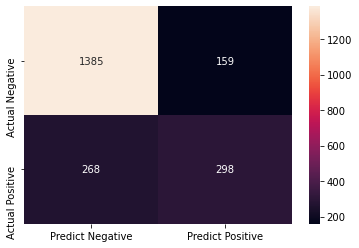

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred_xgb_test)
mat = pd.DataFrame(cm, index=[ 'Actual Negative','Actual Positive'], 
                                 columns=[ 'Predict Negative','Predict Positive'])
sns.heatmap(mat, annot = True, fmt = 'd')

In [59]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
Accuracy  = (accuracy_score(ytest, y_pred_xgb_test ))
Precision  = (TP/(TP+FP))  
Sensitivity =(TP/(TP+FN))
Specificity = (TN/(TN+FP))
F1 = 2*(TP/(TP+FN)*(TP/(TP+FP))/((TP/(TP+FP))+(TP/(TP+FN))))
print('Correct Predictions:' ,TP+TN)
print('False Positives:', FP)
print('False Negatives:', FN)
print('Accuracy:',Accuracy)
print('Precision:',Precision)
print('Sensitivity:',Sensitivity)
print('Specificity:',Specificity)
print('F1:', F1)

Correct Predictions: 1683
False Positives: 159
False Negatives: 268
Accuracy: 0.7976303317535545
Precision: 0.6520787746170679
Sensitivity: 0.5265017667844523
Specificity: 0.897020725388601
F1: 0.5826001955034212


<AxesSubplot:>

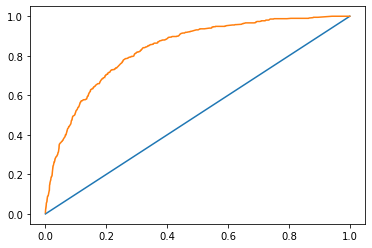

In [60]:
from sklearn.metrics import roc_curve
y_pred = xgb_final.predict_proba(xtest)[:,1]
fpr, tpr, thresholds = roc_curve(ytest, y_pred)
sns.lineplot([0,1], [0,1])
sns.lineplot(fpr, tpr)

In [62]:
from sklearn.metrics import roc_auc_score
print('ROC AUC: {:.4f}'.format(roc_auc_score(ytest, y_pred)))

ROC AUC: 0.8351


In [63]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_final, xtrain, ytrain, cv = 10, scoring='accuracy')
print('Average 10 fold Cross Validation Accuracy for testing data: ', scores.mean())

[18:52:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:52:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:52:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:52:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

# Final Results:

Training accuracy:  0.8104043893517577

Testing accuracy:  0.7976303317535545

Average 10 fold Cross Validation Accuracy for testing data:  0.8085728656475204

ROC AUC: 0.8351

Precision: 0.6520787746170679

Sensitivity: 0.5265017667844523

Specificity: 0.897020725388601

F1: 0.5826001955034212

Classifier: XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=0.6, colsample_bytree=0.94, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.7, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=8, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=0.97,
              tree_method='exact', validate_parameters=1, verbosity=None)